# Objective
Perform exploratory data analysis (EDA) to understand data and relationship between them if any.

Steps in Data Exploration and Preprocessing :
1. Identification of variables and data types
2. Analyzing the basic metrics
3. Non-Graphical Univariate Analysis
4. Graphical Univariate Analysis
5. Bivariate Analysis
6. Variable transformations
7. Missing value treatment
8. Outlier treatment
9. Correlation Analysis
10. Dimensionality Reduction

Type of variables
1. categorical variable
      1. nominal
      2. ordinal
2. numerical variable
      1. continuous
      2. discrete

Importing libraries needed to start EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Overview of dataset

Reading the dataset here.

In [2]:
df_car = pd.read_csv('clean_data.csv')

In [3]:
df = df_car.copy()

Let's take a quick look at dataset.

In [4]:
display(df.head(3))

,title,Location,Details,Dealer,Contact,Description,price($),year,age_of_car,model,...,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,Major Options,No._of_features,description_len
0,2017 Mercedes-Benz GLS-Class GLS 450 4MATIC AW...,"Murrieta, CA · 71 mi away","Dealer's Price:\n$36,999\nLocation:\nMurrieta,...",Abramovich Motors,(951) 307-1720,Dealer's Description\nTravel in style behind t...,36999,2017,7,Mercedes-Benz,...,Black,17,22,19,V6,All-Wheel Drive,Gasoline,"Bluetooth, Backup Camera, Sunroof/Moonroof, He...",5,2551
1,"2017 Chevrolet Tahoe Premier RWD - $39,415","Colton, CA · 52 mi away","Dealer's Price:\n$39,415\nLocation:\nColton, C...",Avis Car Sales - Colton,(951) 484-1038,Dealer's Description\nCARFAX One-Owner. Clean ...,39415,2017,7,Chevrolet,...,Black,-1,-1,-1,V8,Front-Wheel Drive,Flex Fuel Vehicle,"Leather Seats, Power Package, Navigation Syste...",15,6158
2,"2020 Honda Accord 1.5T LX FWD - $19,697","Carson, CA · 13 mi away","Dealer's Price:\n$19,697\nLocation:\nCarson, C...",Carson Honda,(657) 500-3739,"Dealer's Description\nWheels: 17"" Silver-Paint...",19697,2020,4,Honda,...,Black,30,38,33,I4,Front-Wheel Drive,Gasoline,"Bluetooth, Backup Camera, Adaptive Cruise Cont...",5,2683


Columns 'title' to 'Description' are from original dataset from which I already extracted the important information in the following columns. So i will drop those columns below.

In [5]:
df.columns

Index(['title', 'Location', 'Details', 'Dealer', 'Contact', 'Description',
       'price($)', 'year', 'age_of_car', 'model', 'location', 'len_of details',
       'Transmission', 'Mileage(miles)', 'Exterior_Color', 'Interior_Color',
       'Gas_mileage_city(MPG)', 'Gas_mileage_HW(MPG)', 'Gas_mileage_comb(MPG)',
       'Engine', 'Drivetrain', 'Fuel_type', 'Major Options', 'No._of_features',
       'description_len'],
      dtype='object')

In [6]:
df = df.drop(columns = ['title', 'Location', 'Details', 'Dealer', 'Contact', 'Description', 'Major Options', 'len_of details','year'])

In [7]:
display(df.head(3))

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len
0,36999,7,Mercedes-Benz,CA,Automatic,30336,Silver,Black,17,22,19,V6,All-Wheel Drive,Gasoline,5,2551
1,39415,7,Chevrolet,CA,Automatic,36052,Black,Black,-1,-1,-1,V8,Front-Wheel Drive,Flex Fuel Vehicle,15,6158
2,19697,4,Honda,CA,-1,17000,Gray,Black,30,38,33,I4,Front-Wheel Drive,Gasoline,5,2683


The **target value** is **price of car**, and the rest features can be assumed as the **Independent variables**.

Size of the dataset and identification of data types:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   price($)               1622 non-null   int64 
 1   age_of_car             1622 non-null   int64 
 2   model                  1622 non-null   object
 3   location               1622 non-null   object
 4   Transmission           1622 non-null   object
 5   Mileage(miles)         1622 non-null   int64 
 6   Exterior_Color         1622 non-null   object
 7   Interior_Color         1622 non-null   object
 8   Gas_mileage_city(MPG)  1622 non-null   int64 
 9   Gas_mileage_HW(MPG)    1622 non-null   int64 
 10  Gas_mileage_comb(MPG)  1622 non-null   int64 
 11  Engine                 1622 non-null   object
 12  Drivetrain             1622 non-null   object
 13  Fuel_type              1622 non-null   object
 14  No._of_features        1622 non-null   int64 
 15  description_len      

Statistical Summary of Numeric Variables:

In [9]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
price($),1622.0,27279.541307,17721.588482,4999.0,16014.00,22996.0,33908.25,218900.0
age_of_car,1622.0,6.880395,2.866643,3.0,5.00,6.0,8.00,25.0
Mileage(miles),1622.0,46322.313194,36023.614453,247.0,22733.75,34660.0,63479.25,303558.0
Gas_mileage_city(MPG),1622.0,18.991369,13.737377,-1.0,15.00,20.0,24.00,127.0
Gas_mileage_HW(MPG),1622.0,24.721332,14.374862,-1.0,21.00,27.0,33.00,110.0
Gas_mileage_comb(MPG),1622.0,21.194205,13.737960,-1.0,17.00,23.0,28.00,119.0
No._of_features,1622.0,7.079531,4.993935,-1.0,4.00,6.0,10.00,41.0
description_len,1622.0,2882.959926,1599.575789,125.0,1799.00,2649.5,3735.00,13009.0


Check for duplicated entries:

In [10]:
print("\nNumber of duplicated entries: ", len(df[df.duplicated()]))
display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
df = df.drop_duplicates().reset_index(drop=True)
print('Duplicated entries removed successfully!')


Number of duplicated entries:  17


,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len
636,9495,8,Ford,CA,Automatic,41264,Black,-1,26,38,31,I4,Front-Wheel Drive,Flex Fuel Vehicle,3,2169
1009,9495,8,Ford,CA,Automatic,41264,Black,-1,26,38,31,I4,Front-Wheel Drive,Flex Fuel Vehicle,3,2169
652,11980,9,MINI,CA,Automatic,45800,Blue,Black,28,37,32,I3,Front-Wheel Drive,Gasoline,5,5343
1010,11980,9,MINI,CA,Automatic,45800,Blue,Black,28,37,32,I3,Front-Wheel Drive,Gasoline,5,5343
63,11999,9,Honda,CA,Automatic,56379,Silver,-1,30,39,34,I4,Front-Wheel Drive,Gasoline,4,1512


Duplicated entries removed successfully!


# Non-Graphical Univariate Analysis:

Finding null values:  


In [11]:
df.apply(lambda x: sum(x == '-1') or sum(x == -1),axis=0)

price($)                   0
age_of_car                 0
model                      0
location                  76
Transmission             210
Mileage(miles)             0
Exterior_Color           178
Interior_Color           404
Gas_mileage_city(MPG)    273
Gas_mileage_HW(MPG)      273
Gas_mileage_comb(MPG)    273
Engine                    40
Drivetrain                61
Fuel_type                 22
No._of_features           52
description_len            0
dtype: int64

For now I will leave null values as it is. I will impute them in the later stages.

# Graphical Univariate Analysis (Continuous variables):
I will use Histograms for understanding distribution and Box Plots for outliers detection.  

In [12]:
#     take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3
def histogram_plot(df, column, x_end, bins):
    plt.style.use("bmh")
    
    fig, ax = plt.subplots(figsize = (8,6))

    # Plots #
    # Plot histogram
    ax.grid(False)
    df[column].plot(kind = "hist", density = True, alpha = 0.80, bins = bins)
    # change density to true, because KDE uses density
    
    # Plot KDE
    df[column].plot(kind = "kde")

    # X #
    ax.set_xlabel(column, fontsize = 12)
    ax.set_xlim(0, x_end)

    # Y #
    ax.set_yticks([])
    # Relabel the axis 
    ax.set_ylabel("Frequency", fontsize = 12)
    
    # Overall #
    ax.set_title("Histogram plot of {}".format(column), size = 17, pad = 10)
    ax.tick_params(left = False, bottom = False)
    for ax, spine in ax.spines.items():
        spine.set_visible(False)
    plt.show()

In [13]:
# ref : https://github.com/mGalarnyk/Python_Tutorials/blob/master
#              /Statistics/boxplot/Box_plot_interpretation.ipynb
def box_plot(df, column):    
    plt.figure(figsize=(5,5))

    sns.boxplot(x= column, data=df, palette="Blues")

    # Changing default seaborn/matplotlib to be more readable
    plt.xlabel(column, fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

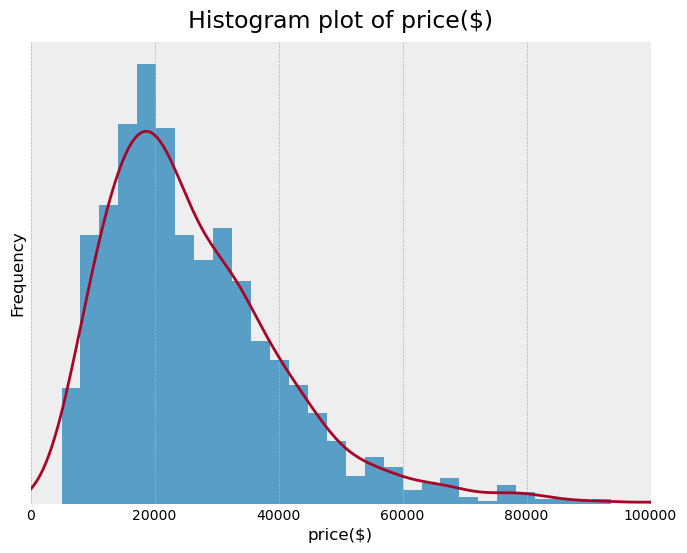

In [14]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'price($)', 100000, 70)

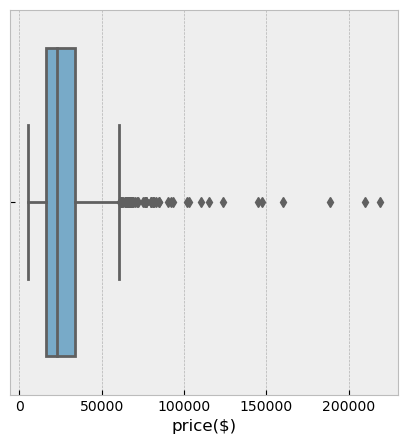

In [15]:
box_plot(df, 'price($)')

Most of the used cars are sold around $20,000 and distribution is right skewed because of some cars being very expensive. Lets see what kind of cars are very expensive in the table below.

In [16]:
len(df[df['price($)']>80000])

20

There are only 20 cars which cost more than $80,000. 

In [17]:
display(df[df['price($)']>80000])

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len
67,159900,6,Audi,CA,-1,6891,Gray,Red,14,22,17,V10,All-Wheel Drive,Gasoline,13,1065
100,144900,5,Chevrolet,CA,Automatic,6259,-1,-1,-1,-1,-1,V8,Rear-Wheel Drive,Gasoline,18,538
208,123900,8,Bentley,CA,Automatic,25236,-1,-1,14,24,18,V8,All-Wheel Drive,Gasoline,5,1684
241,81500,6,Porsche,CA,Automatic,37295,Black,Black,22,30,25,H6,Rear-Wheel Drive,Gasoline,4,3714
265,82995,4,Land,CA,Automatic,3155,Silver,Black,15,20,17,V8,All-Wheel Drive,Gasoline,4,1987
276,147500,8,Porsche,CA,Automatic,2526,Black,Black,15,20,17,H6,Rear-Wheel Drive,Gasoline,5,2087
294,218900,6,Ferrari,CA,Automatic,9329,-1,-1,-1,-1,-1,V12,All-Wheel Drive,Gasoline,6,1123
312,80985,6,Land,CA,Automatic,28239,Blue,White,16,21,18,V8,All-Wheel Drive,Gasoline,4,1414
450,101980,4,Chevrolet,CA,Automatic,700,White,Black,15,27,20,V8,Rear-Wheel Drive,Gasoline,14,6787
710,114999,11,Ferrari,CA,Manual,14000,Black,Red,-1,-1,-1,V8,Rear-Wheel Drive,Gasoline,10,4546


Here I can see that cars which cost more than $80,000 are high-end car. For example Ferrari is one of the most expensive car. Lets take a look at how many Ferrari the original data have.

In [18]:
(df['model'] == 'Ferrari').value_counts()

model
False    1603
True        2
Name: count, dtype: int64

Dataset has only 2 Ferrari car which implies that model of the car has a high influence on price of the car and therefore may not be outliers. So I will leave them as it is.

In [19]:
# Cleaned
# df.drop(df.loc[df['price($)'] > 80000].index, inplace=True)
# df = df.reset_index(drop=True)

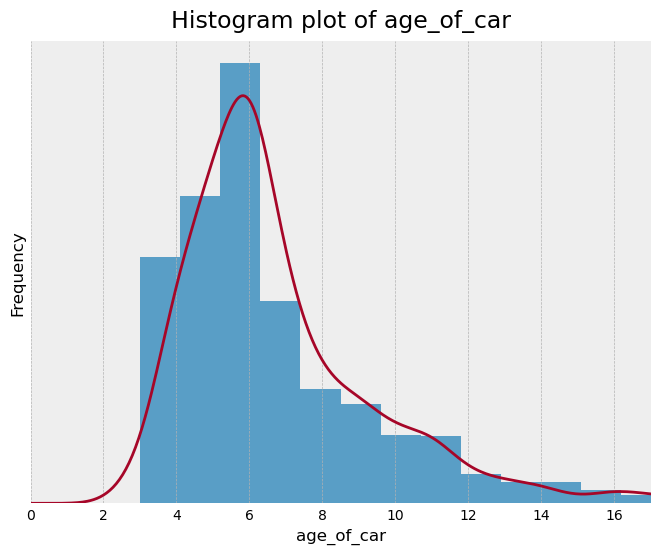

In [20]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'age_of_car', 17, 20)

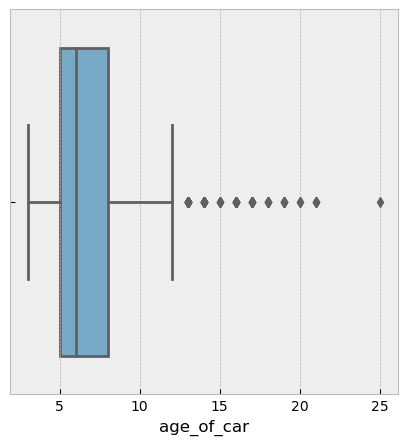

In [21]:
box_plot(df, 'age_of_car')

Most of the cars are being used for 2 to 4 years. Distribution is right skewed due to some cars being sold after 12 -13 years. Lets see how many are there older than 13 years.

In [22]:
len(df[df['age_of_car']>13])

59

In [23]:
df[df['age_of_car']>13][:10]

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len
150,8615,14,Jeep,CA,Automatic,74359,Silver,Gray,21,25,22,I4,Front-Wheel Drive,Gasoline,3,2406
187,11500,21,Jeep,CA,Automatic,116600,Black,Black,14,18,15,I6,Four-Wheel Drive,Gasoline,1,405
216,5999,19,Chevrolet,CA,Automatic,175299,-1,-1,14,18,15,V8,Rear-Wheel Drive,Flex Fuel Vehicle,2,1314
221,7799,16,BMW,CA,Automatic,91153,Gray,Black,17,25,20,I6,All-Wheel Drive,Gasoline,7,802
222,17900,21,Chevrolet,CA,Manual,73332,Red,-1,17,26,21,V8,Rear-Wheel Drive,Gasoline,2,2326
306,14596,14,Dodge,CA,Automatic,152289,Gray,Gray,13,18,15,V8,Four-Wheel Drive,Gasoline,6,4108
354,5958,17,Toyota,CA,Automatic,172854,White,Gray,19,27,22,V6,Front-Wheel Drive,Gasoline,2,306
363,11985,15,Chevrolet,CA,Automatic,169276,Gray,Black,14,20,16,V8,Front-Wheel Drive,Flex Fuel Vehicle,7,11591
396,6999,21,Mercedes-Benz,CA,Automatic,83869,Silver,Gray,17,25,20,V6,Rear-Wheel Drive,Gasoline,2,1976
424,6499,17,Toyota,CA,Automatic,97210,White,Gray,21,30,25,I4,Front-Wheel Drive,Gasoline,2,291


In [24]:
np.mean(df[df['age_of_car']>13]['price($)'])

11386.49152542373

The average price of these cars is low so it may not be outlier for our model. If required, will impute them later.

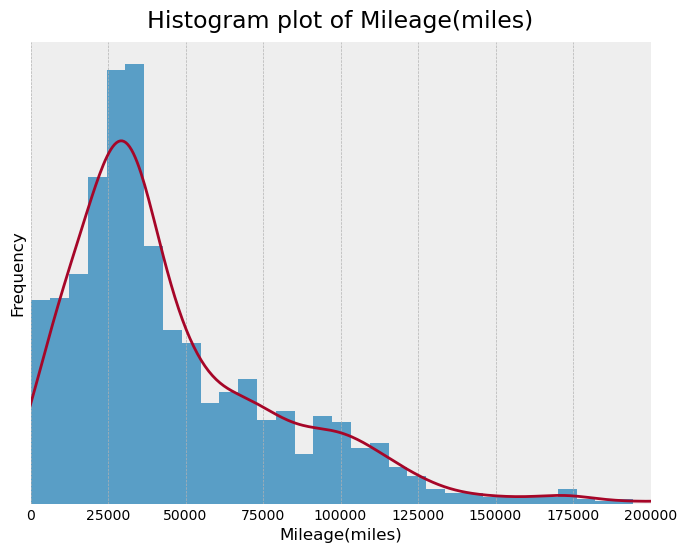

In [25]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'Mileage(miles)', 200000, 50)

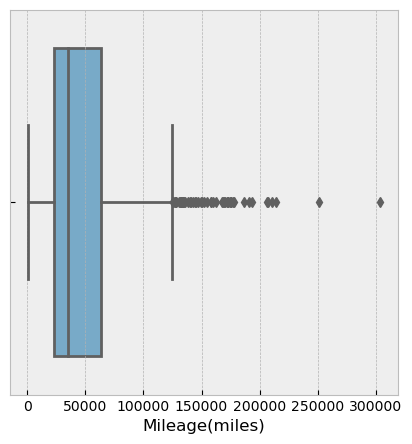

In [26]:
box_plot(df, 'Mileage(miles)')

Most of the cars are sold after driven around 30,000 miles. And only few cars more than 150,000 miles. Lets see how many cars are there in that category.

In [27]:
len(df[df['Mileage(miles)']>150000])

28

In [28]:
display(df[df['Mileage(miles)']>150000])

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len
21,16999,8,Ford,CA,Automatic,172148,White,-1,-1,-1,-1,V6,-1,Gasoline,1,812
55,6750,10,Honda,CA,Automatic,150054,Black,Gray,30,39,34,I4,Front-Wheel Drive,Gasoline,2,3430
143,14999,11,Ford,CA,Automatic,162428,White,Gray,-1,-1,-1,V6,-1,Gasoline,-1,483
216,5999,19,Chevrolet,CA,Automatic,175299,-1,-1,14,18,15,V8,Rear-Wheel Drive,Flex Fuel Vehicle,2,1314
288,8995,10,Honda,CA,Automatic,186923,-1,Black,21,32,25,V6,Front-Wheel Drive,Gasoline,3,5202
306,14596,14,Dodge,CA,Automatic,152289,Gray,Gray,13,18,15,V8,Four-Wheel Drive,Gasoline,6,4108
307,17828,12,Toyota,CA,Automatic,158026,Silver,Gray,17,21,18,V6,Front-Wheel Drive,Gasoline,7,995
354,5958,17,Toyota,CA,Automatic,172854,White,Gray,19,27,22,V6,Front-Wheel Drive,Gasoline,2,306
363,11985,15,Chevrolet,CA,Automatic,169276,Gray,Black,14,20,16,V8,Front-Wheel Drive,Flex Fuel Vehicle,7,11591
528,18995,16,Ford,CA,Automatic,170282,-1,-1,-1,-1,-1,V8,-1,Diesel,3,1469


In [29]:
np.mean(df[df['Mileage(miles)']>150000]['price($)'])

11245.25

The average price of car is low and expected for higher driven cars. If required I will impute them later. 

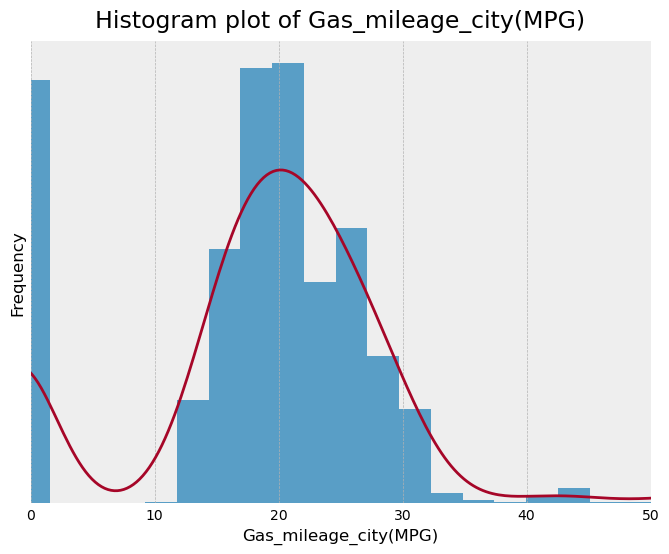

In [30]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'Gas_mileage_city(MPG)', 50, 50)

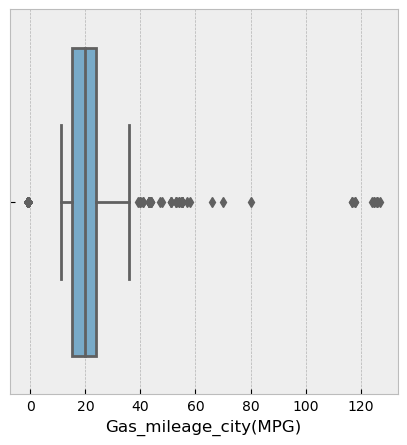

In [31]:
box_plot(df, 'Gas_mileage_city(MPG)')

Most of the cars have mileage ranging from 10-30 MPG. However there are some cars with more than 100 MPG. Lets take a look at dataset for those cars.  
Also high frequency at 0 is due to missing values. I will impute them later.

In [32]:
len(df[df['Gas_mileage_city(MPG)']>80])

11

In [33]:
display(df[df['Gas_mileage_city(MPG)']>80])

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len
30,9386,7,Ford,CA,Automatic,36984,White,-1,118,96,108,-1,Front-Wheel Drive,Electric,9,4125
50,9750,7,Ford,CA,Automatic,34584,Silver,-1,118,96,108,-1,Front-Wheel Drive,Electric,10,4135
301,18887,6,BMW,CA,Automatic,20122,Black,Gray,117,101,109,I2,Rear-Wheel Drive,Gasoline,6,2438
544,19490,6,BMW,CA,Automatic,23104,White,-1,117,101,109,I2,Rear-Wheel Drive,Gasoline,16,2023
1059,8250,9,Nissan,CA,Automatic,36998,Red,Gray,126,101,114,-1,Front-Wheel Drive,Electric,5,4044
1158,19999,6,Chevrolet,WA,Automatic,36125,Red,Gray,127,110,119,-1,Front-Wheel Drive,Electric,5,484
1380,6891,10,Nissan,WA,Automatic,65108,Black,Black,126,101,114,-1,Front-Wheel Drive,Electric,5,839
1558,16910,6,Nissan,WA,Automatic,22671,Silver,Black,125,100,113,-1,Front-Wheel Drive,Electric,2,1537
1559,17781,6,Nissan,WA,Automatic,17460,Blue,Black,125,100,113,-1,Front-Wheel Drive,Electric,3,1637
1560,17981,5,Nissan,WA,Automatic,15295,Silver,Black,124,99,112,-1,Front-Wheel Drive,Electric,6,1747


Most of the cars with high mileage are electric vehicles. Electric cars are more cost efficient and therefore can have higher mileage for the same cost of gasoline. I will not drop this data.

In [34]:
len(df[df['Gas_mileage_city(MPG)']<0])

273

This are missing values. Since the number of missing values are quite high, its better to impute with average value than to drop these values.

In [35]:
df['Gas_mileage_city(MPG)'].iloc[df[df['Gas_mileage_city(MPG)'] < 0].index] = int(df['Gas_mileage_city(MPG)'][df['Gas_mileage_city(MPG)'] > 0].mean())

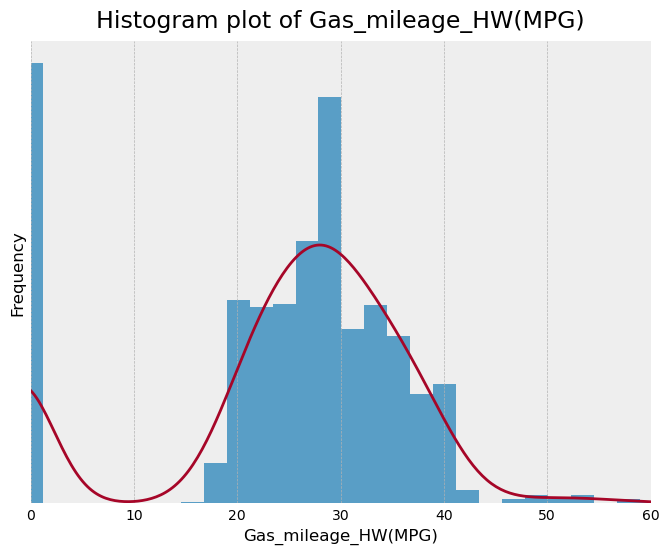

In [36]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'Gas_mileage_HW(MPG)', 60, 50)

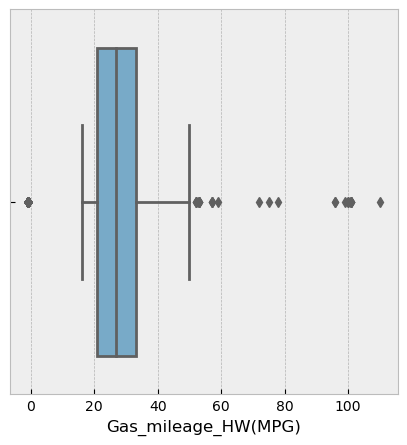

In [37]:
box_plot(df, 'Gas_mileage_HW(MPG)')

This graph show similar behavior to city mileage which also makes sense as both are gas mileage.

In [38]:
len(df[df['Gas_mileage_HW(MPG)']<0])

273

Similar to city gas mileage I will impute the missing values with the average mileage of highway.

In [39]:
df['Gas_mileage_HW(MPG)'].iloc[df[df['Gas_mileage_HW(MPG)'] < 0].index] = int(df['Gas_mileage_HW(MPG)'][df['Gas_mileage_HW(MPG)'] > 0].mean())

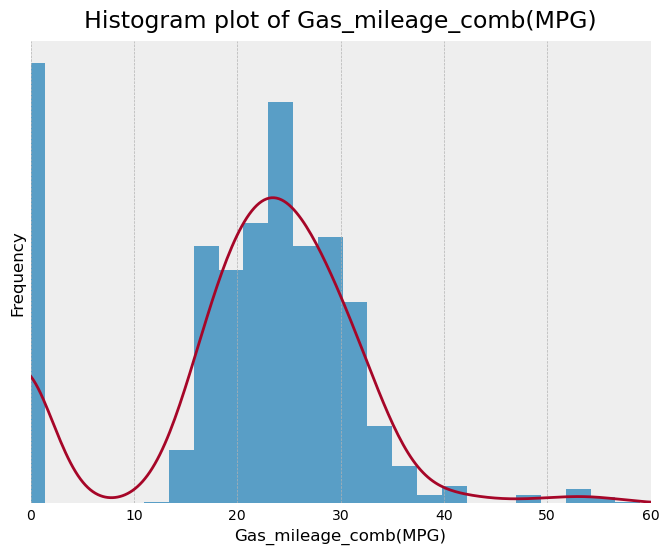

In [40]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'Gas_mileage_comb(MPG)', 60, 50)

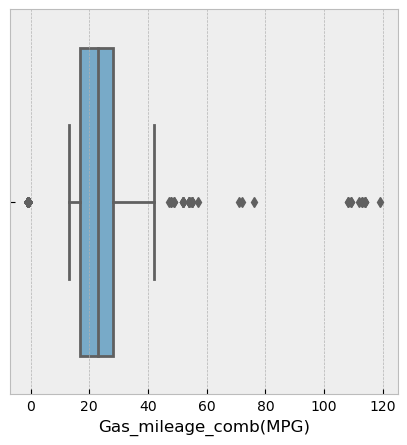

In [41]:
box_plot(df, 'Gas_mileage_comb(MPG)')

Similar graph to gas mileage of city and highway. 

In [42]:
len(df[df['Gas_mileage_comb(MPG)']<0])

273

Similar to city gas mileage I will impute the missing values with the average combined mileage.

In [43]:
df['Gas_mileage_comb(MPG)'].iloc[df[df['Gas_mileage_comb(MPG)'] < 0].index] = int(df['Gas_mileage_comb(MPG)'][df['Gas_mileage_comb(MPG)'] > 0].mean())

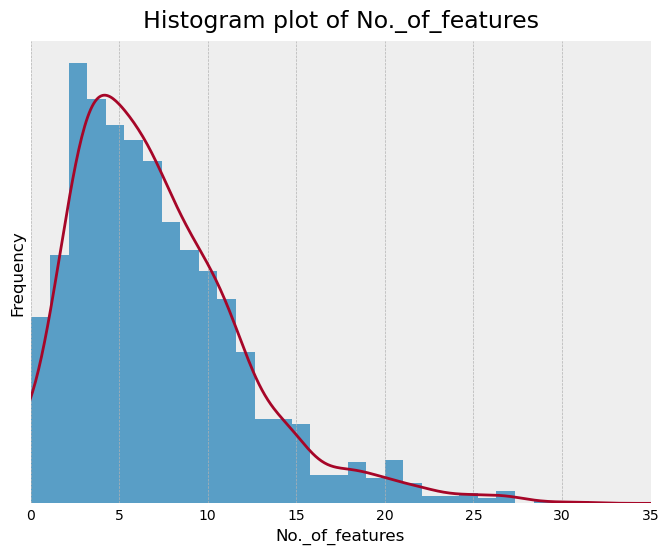

In [44]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'No._of_features', 35, 40)

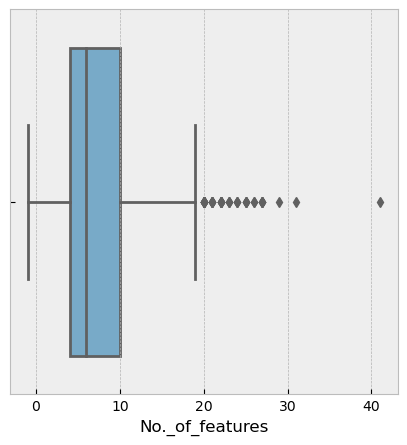

In [45]:
box_plot(df, 'No._of_features')

Most of the cars have up to 20 features. There are some cars with features more than 25. Lets take a look at those data below.

In [46]:
len(df[df['No._of_features']>25])

10

In [47]:
df[df['No._of_features']>25]

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len
104,40888,4,Lexus,CA,Automatic,3285,-1,-1,20,27,23,V6,Front-Wheel Drive,Gasoline,41,5771
133,34600,5,Nissan,CA,Automatic,51331,Black,Black,15,21,17,V8,Four-Wheel Drive,Gasoline,27,2080
390,32988,6,BMW,CA,Automatic,33087,Black,-1,18,25,21,I6,Rear-Wheel Drive,Gasoline,29,8539
531,21975,6,Mercedes-Benz,CA,Automatic,37523,White,-1,24,32,27,I4,All-Wheel Drive,Gasoline,26,3902
547,46995,6,Audi,CA,Automatic,23900,Gray,Black,19,25,21,V6,All-Wheel Drive,Gasoline,31,6640
756,39593,5,Nissan,CA,Automatic,26630,Red,Black,15,21,17,V8,Four-Wheel Drive,Gasoline,27,2080
824,34900,6,BMW,CA,Automatic,38668,White,Black,18,25,21,I6,Rear-Wheel Drive,Gasoline,26,2287
1024,34500,5,Nissan,CA,Automatic,51331,Black,Black,15,21,17,V8,Four-Wheel Drive,Gasoline,27,2080
1035,38198,5,Nissan,CA,Automatic,26630,Red,Black,15,21,17,V8,Four-Wheel Drive,Gasoline,27,2080
1489,65900,5,GMC,WA,Automatic,48059,Black,Black,23,29,25,V8,Four-Wheel Drive,Biodiesel,27,5868


The aim is to see if no. of features has any affect on the price of car. From the table above it is clear that price range vary from around 20,000 to 65,000. It is possible that these could be input mistake. If required I will impute them later.

In [48]:
# Cleaned
# df.drop(df[df['No._of_features']>25].index, inplace=True)
# df = df.reset_index(drop=True)

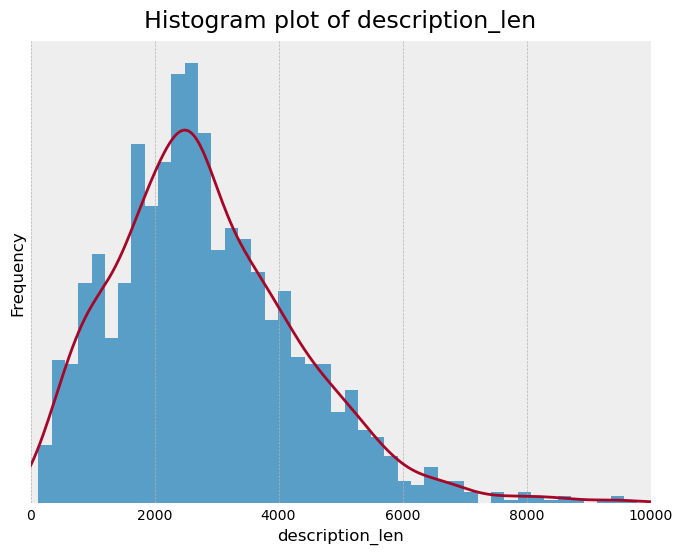

In [49]:
#histogram_plot(df, column, x_end, bins)
histogram_plot(df , 'description_len', 10000, 60)

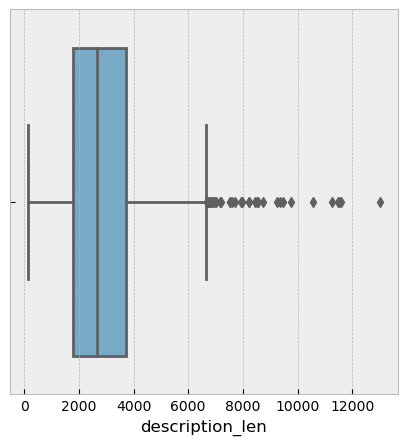

In [50]:
box_plot(df, 'description_len')

Most of the description is written in around 2000 to 3000 words.  

# Categorical Variables

In [53]:
def categorical_eda(df, col, h, a):
    # Plot count distribution of categorical data
    sns.reset_orig()
    df1 = df[df[col] != str('-1')]

    fig = sns.catplot(x=df1[col], kind="count", data=df1, height = h, aspect = a, 
                      order = df1[col].value_counts().index)
    plt.xlabel('{}'.format(col), fontsize =12)
    plt.ylabel('Count', fontsize =12)
    fig.set_xticklabels(rotation=90, fontsize=12)
    plt.show()
    
    
    
    
    


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_histplot(df, col):
    # Plot histogram-like distribution of categorical data
    sns.reset_orig()
    plt.figure(figsize=(10, 6))  # Set the figure size

    sns.histplot(x=col, data=df,kde=True)  # Create the count plot
    plt.xlabel(col, fontsize=12)  # Set the label for the x-axis
    plt.ylabel('Count', fontsize=12)  # Set the label for the y-axis
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better visibility
    plt.title('Histogram-like Distribution of {}'.format(col), fontsize=14)  # Set the plot title
    plt.show()



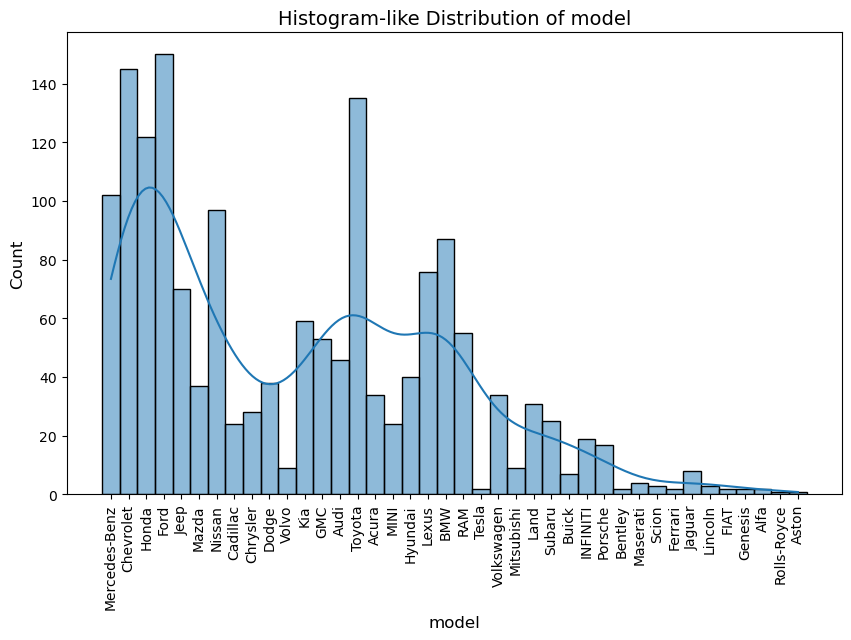

In [73]:
categorical_histplot(df, 'model')

Ford and Chevrolet cars are the most selling cars which make sense as they are American brands. Asian companies Toyota and Honda are also very common.

CA: California 
WA: Washington


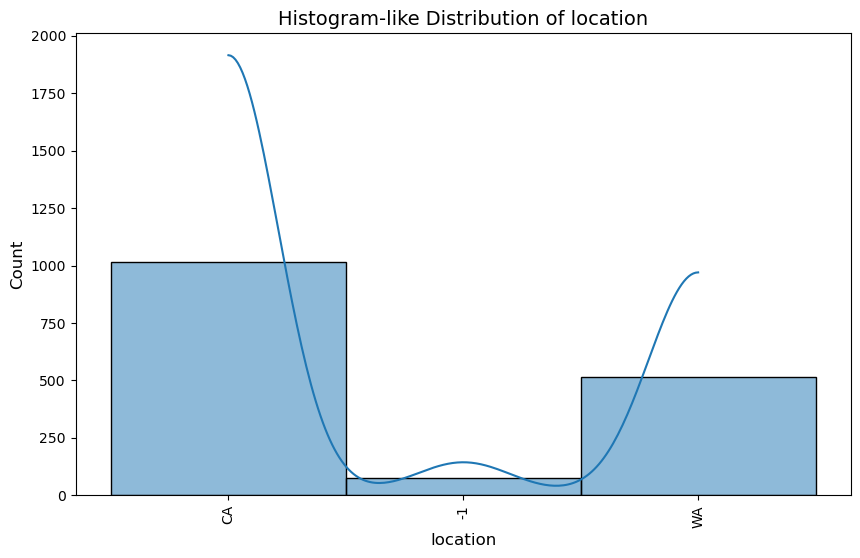

In [74]:
print('CA: California \nWA: Washington')
categorical_histplot(df, 'location')


In [77]:
len(df.loc[df['location']==str(-1)])

0

Since location won't affect the price of car that much, we will replace missing values(-1) with CA because of it's high value count.

In [76]:
df['location'] = df['location'].apply(lambda x: 'CA' if x == '-1' else x)

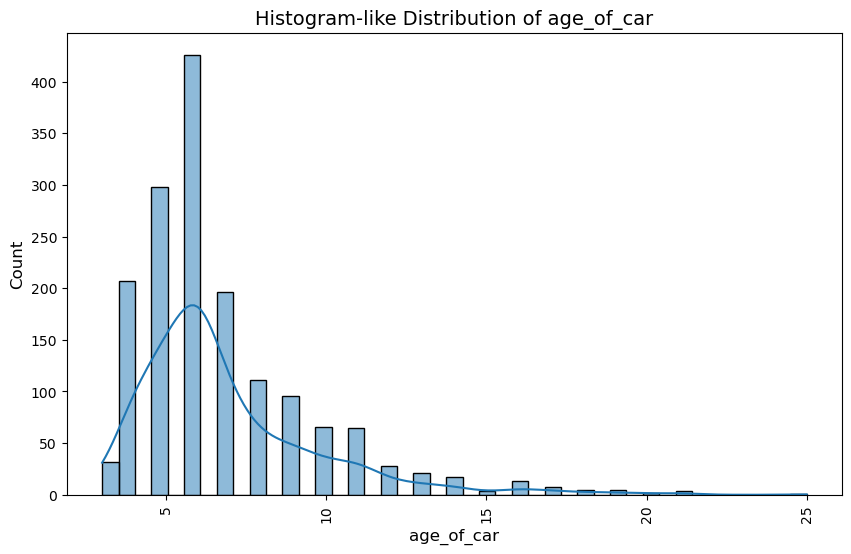

In [78]:
categorical_histplot(df, 'age_of_car')

Data shows that people sell there cars after using it for 1 to 6 years majorly. There are some cars which are older than 20 years as well.

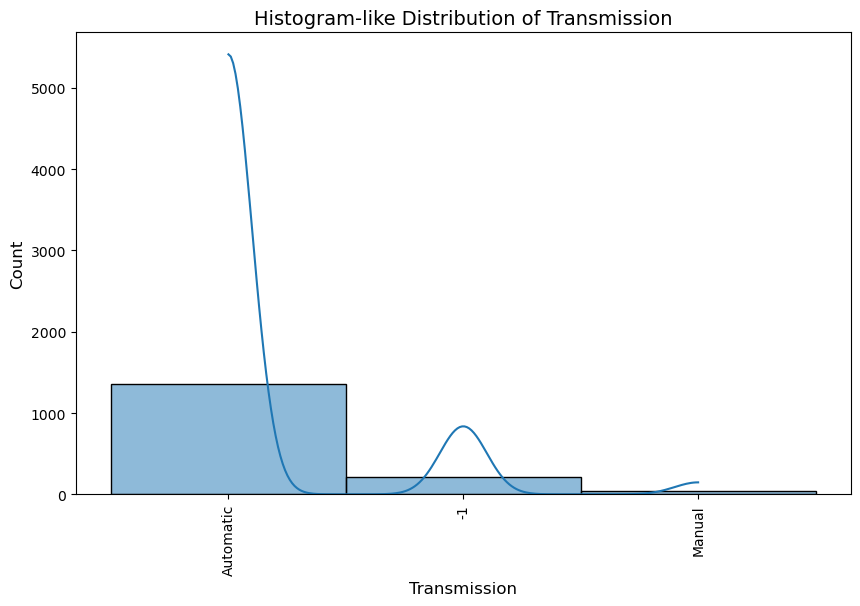

In [79]:
categorical_histplot(df, 'Transmission')

In [80]:
len(df.loc[df['Transmission']==str(-1)])

210

A lot of car has missing value(-1) for Transmission. I am going to replace them with Automatic as most of cars nowadays are Automatic and so does the count value is high for Automatic transmission.

In [81]:
df['Transmission'] = df['Transmission'].apply(lambda x: 'Automatic' if x == '-1' else x)

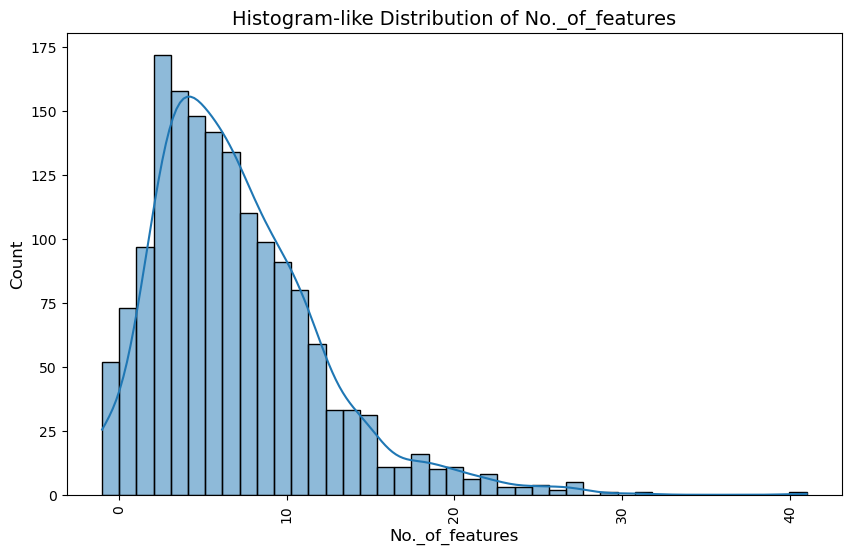

In [82]:
categorical_histplot(df, 'No._of_features')

Most cars have 3 to 7 features. Some have more than 30 which could be outliers.

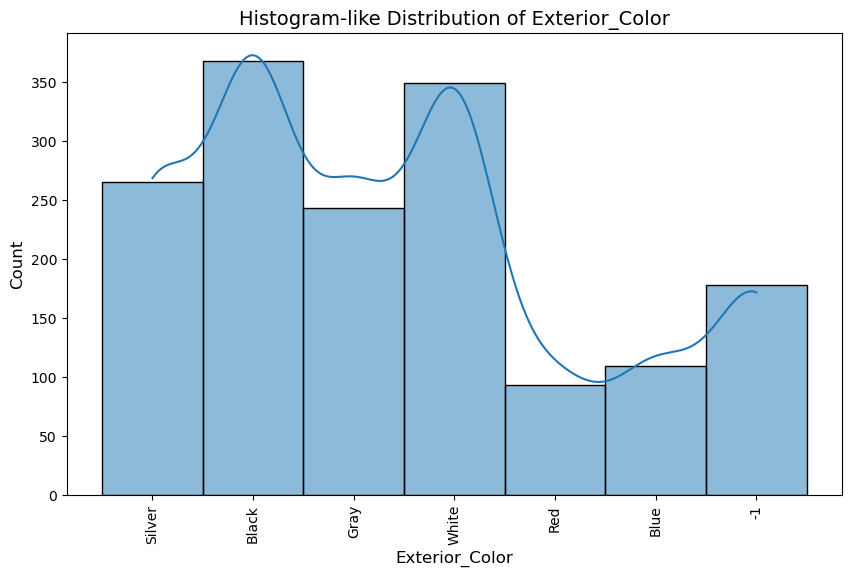

In [83]:
categorical_histplot(df, 'Exterior_Color')

In [84]:
len(df.loc[df['Exterior_Color']==str(-1)])

178

Since the number of missing values is high we can impute the missing variables by adding a new column to capture it.  


In [85]:
df['Exterior_color_imputed'] = df['Exterior_Color'].apply(lambda x: 1 if x == '-1' else 0)

In [86]:
df['Exterior_Color'] = df['Exterior_Color'].apply(lambda x: 'Black' if x == '-1' else x)

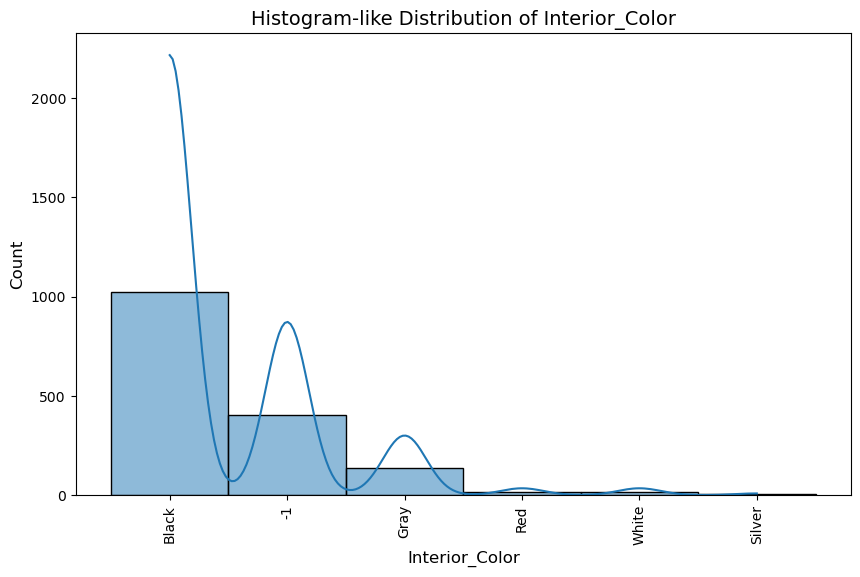

In [87]:
categorical_histplot(df, 'Interior_Color')

In [88]:
len(df.loc[df['Interior_Color']==str(-1)])

404

Replacing missing values(-1) with Black color which is mode of the variable. 

In [89]:
df['Interior_Color'] = df['Interior_Color'].apply(lambda x: 'Black' if x == '-1' else x)

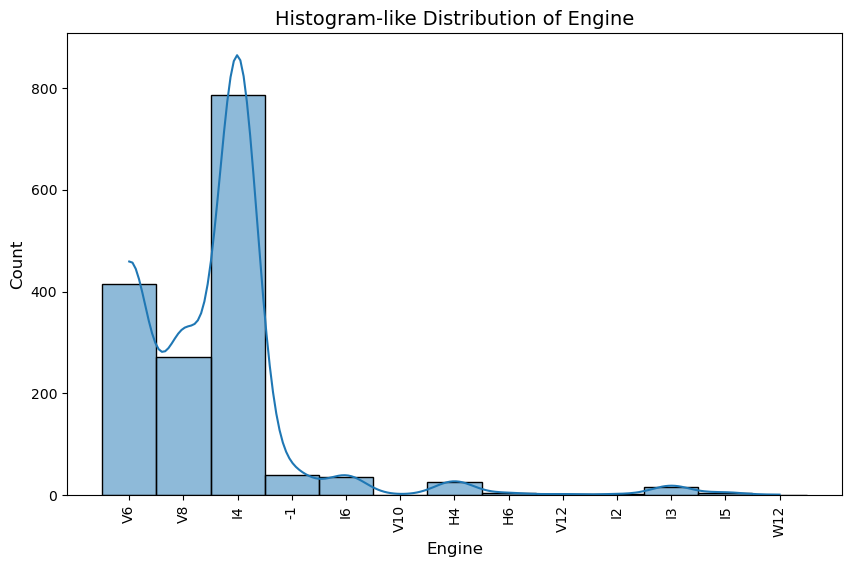

In [90]:
categorical_histplot(df, 'Engine')

In [91]:
len(df.loc[df['Engine']==str(-1)])

40

I will replace the missing values with I4 as it is the most common engine in car.

In [92]:
df['Engine'] = df['Engine'].apply(lambda x: 'I4' if x == '-1' else x)

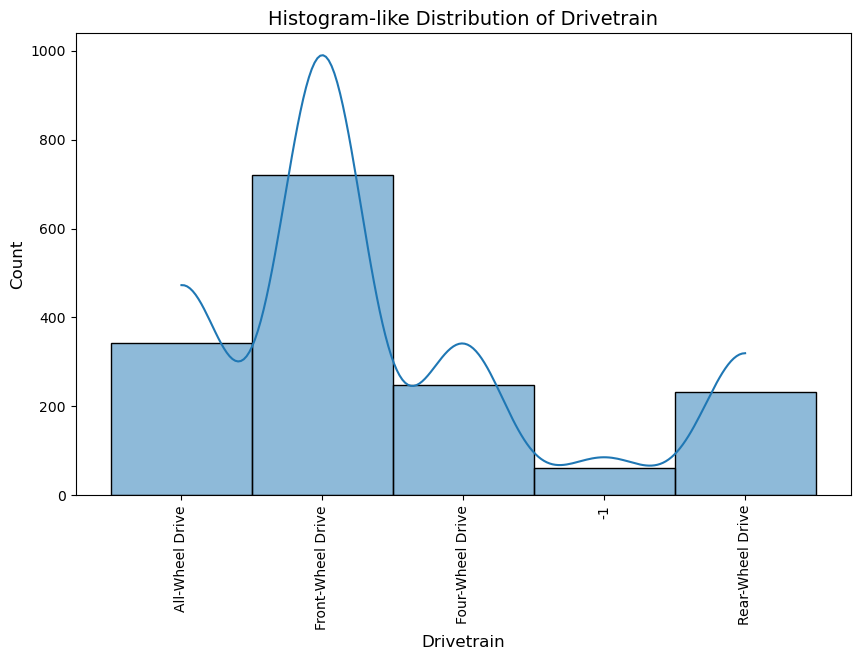

In [93]:
categorical_histplot(df, 'Drivetrain')

In [94]:
len(df.loc[df['Drivetrain']==str(-1)])

61

Since most cars have FWD it is better to replace missing values with FWD.

In [95]:
df['Drivetrain'] = df['Drivetrain'].apply(lambda x: 'Front-Wheel Drive' if x == '-1' else x)

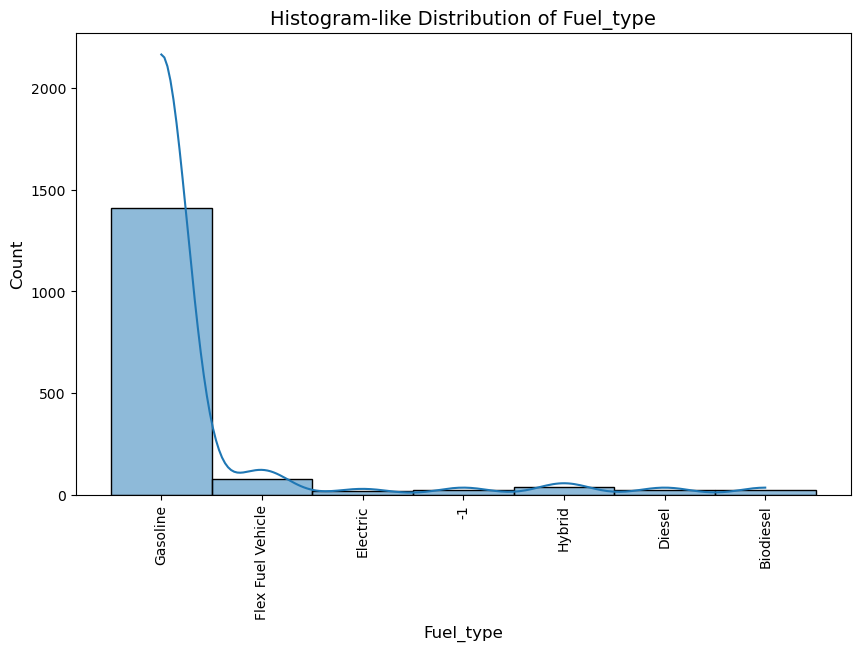

In [96]:
categorical_histplot(df, 'Fuel_type')

In [97]:
len(df.loc[df['Fuel_type']==str(-1)])

22

Replacing missing values with Gasoline as it is the most common type of fuel in cars.

In [98]:
df['Fuel_type'] = df['Fuel_type'].apply(lambda x: 'Gasoline' if x == '-1' else x)

In [99]:
df.shape

(1605, 17)

# Bivariate Analysis

In [100]:
df.head()

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len,Exterior_color_imputed
0,36999,7,Mercedes-Benz,CA,Automatic,30336,Silver,Black,17,22,19,V6,All-Wheel Drive,Gasoline,5,2551,0
1,39415,7,Chevrolet,CA,Automatic,36052,Black,Black,23,29,25,V8,Front-Wheel Drive,Flex Fuel Vehicle,15,6158,0
2,19697,4,Honda,CA,Automatic,17000,Gray,Black,30,38,33,I4,Front-Wheel Drive,Gasoline,5,2683,0
3,24799,7,Ford,CA,Automatic,39221,Gray,Black,17,24,20,V6,Front-Wheel Drive,Gasoline,7,3341,0
4,24299,7,Jeep,CA,Automatic,33961,White,Black,17,21,18,V6,Four-Wheel Drive,Gasoline,1,2090,0


# Continuous - continuous relationship

In [101]:
def scatter_plot(df, x_input):    
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize = (10,6))
    sns.regplot(x=df[x_input], y=df['price($)'], fit_reg=True, 
                line_kws={"color": "black"})
    plt.title('Scatter plot of Price($) of car vs {}'.format(x_input), fontsize=13)
    plt.xlabel('{}'.format(x_input), fontsize =12)
    plt.ylabel('Price($)', fontsize =12)
    plt.show()

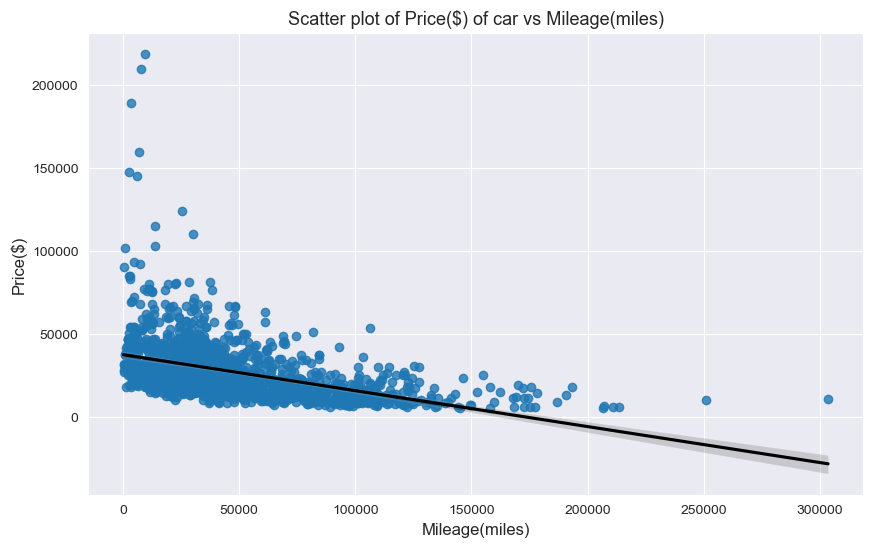

In [102]:
scatter_plot(df, 'Mileage(miles)')

Price has a negative dependence on the mileage of the car. More driven cars are more likely to be sold cheaper.

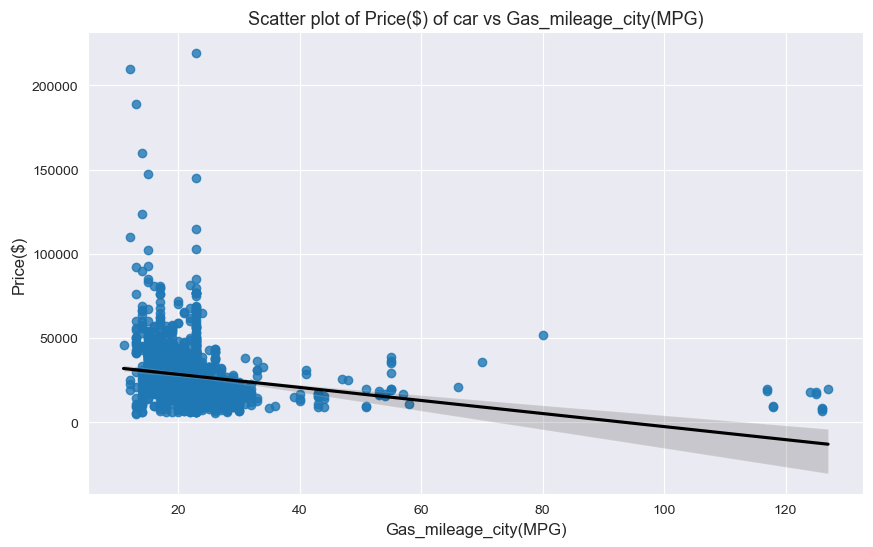

In [103]:
scatter_plot(df, 'Gas_mileage_city(MPG)')

Price has a negative dependence on gas mileage which could be possible because strong engine require more energy to run and expensive cars run on strong engine which may have lower gas mileage. 

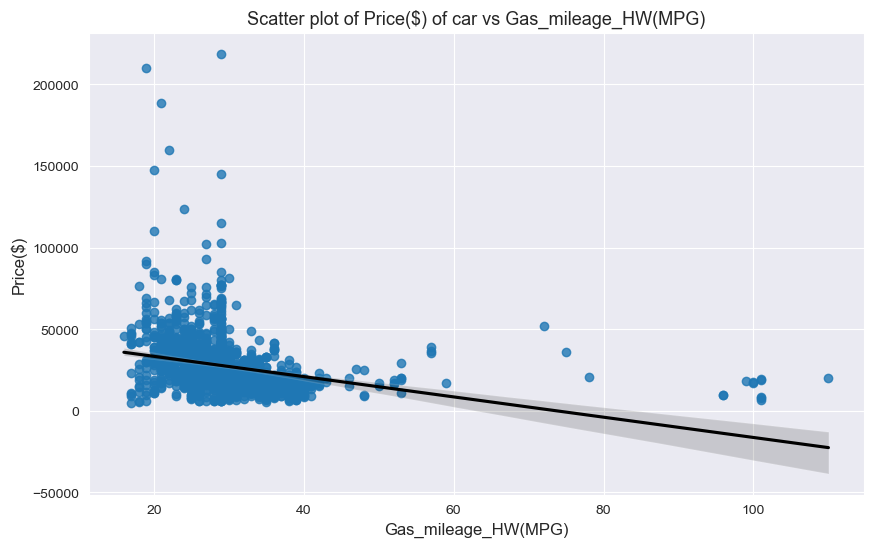

In [104]:
scatter_plot(df, 'Gas_mileage_HW(MPG)')

Similar to gas mileage in city.

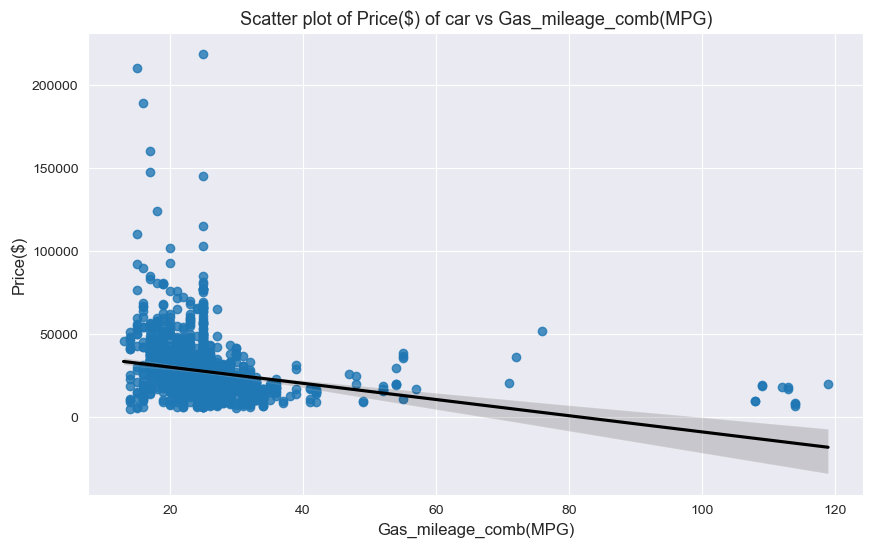

In [105]:
scatter_plot(df, 'Gas_mileage_comb(MPG)')

Similar to gas mileage in city.

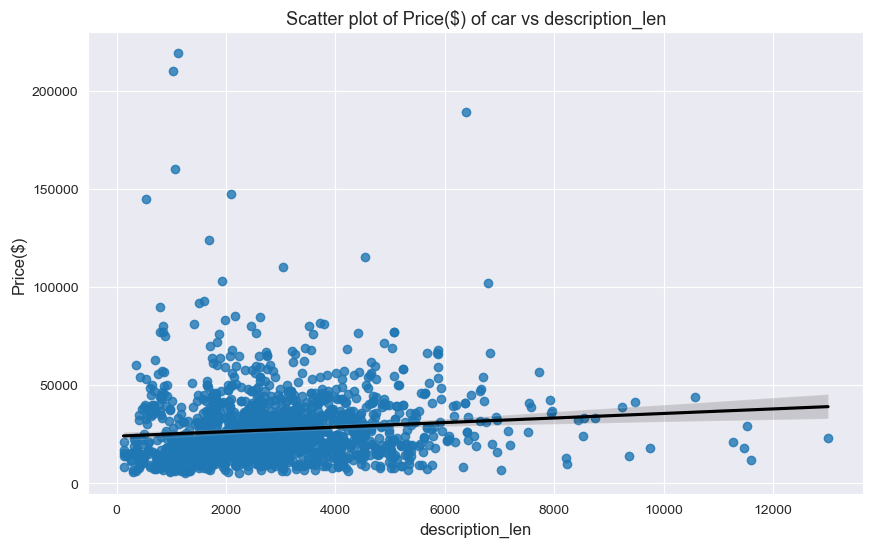

In [106]:
scatter_plot(df, 'description_len')

Price shows a slightly positive dependence with length of description written. Maybe people write more for expensive cars.

In [107]:
plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
font = {'fontname':'Arial'}
plt.xticks(fontsize = 12, **font, fontweight='bold')
plt.yticks(fontsize = 12, **font, fontweight='bold')

sns.heatmap(df[['price($)', 'Mileage(miles)', 'Gas_mileage_city(MPG)', 'Gas_mileage_HW(MPG)',
               'Gas_mileage_comb(MPG)','description_len']].corr(),vmax=1, vmin =-0.5,center=0, 
            cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) ;




Gas mileage in city , highway and combined are highly correlated which make sense as gas_mileage_comb is the average of city and highway. I will drop city and highway mileage columns for model building.  
Price has a negative correlation with mileage (distance driven) and gas mileage of car. And slightly positive related to description length. 


# Continuous - variable relationship

In [108]:
def swarm_plot(df, x_input, rot=0):    
    sns.reset_orig() #reset the figure parameters
    fig, ax = plt.subplots(figsize = (10,6))
    fig = sns.swarmplot(x=x_input, y="price($)", data=df)
    plt.title('Swarm plot of Price($) of car vs {}'.format(x_input), fontsize=13)
    plt.xlabel('{}'.format(x_input), fontsize =12)
    plt.ylabel('Price($)', fontsize =12)
    plt.xticks(rotation=rot, fontsize=12)
    plt.show()

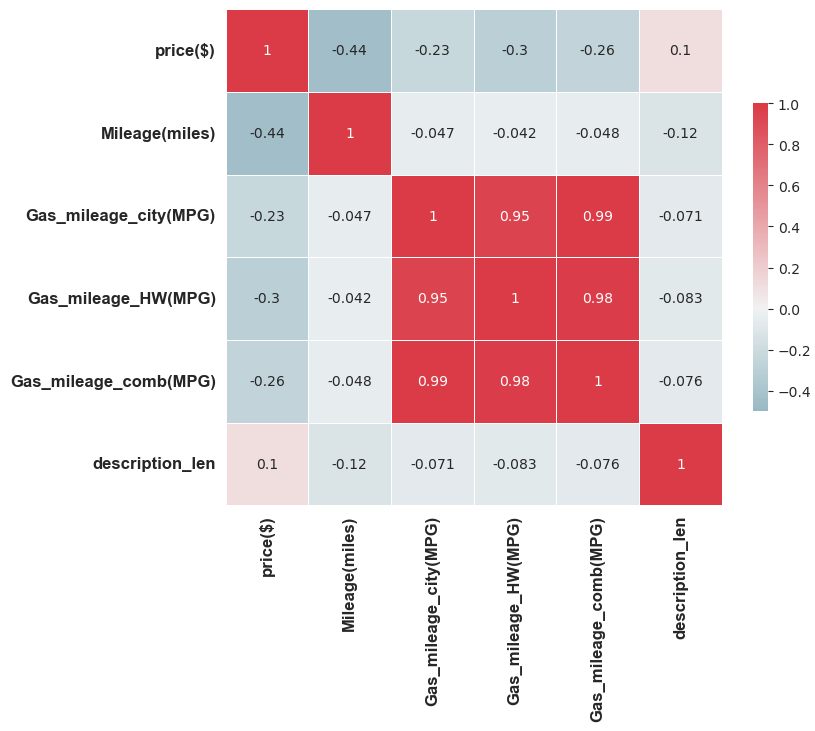

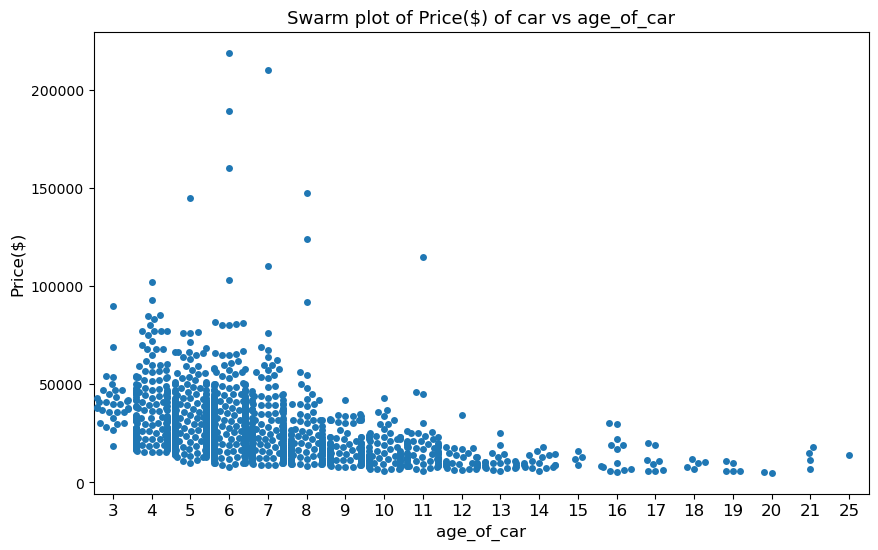

In [109]:
swarm_plot(df, 'age_of_car')

Price of car slightly decreases with increase in age of the car.

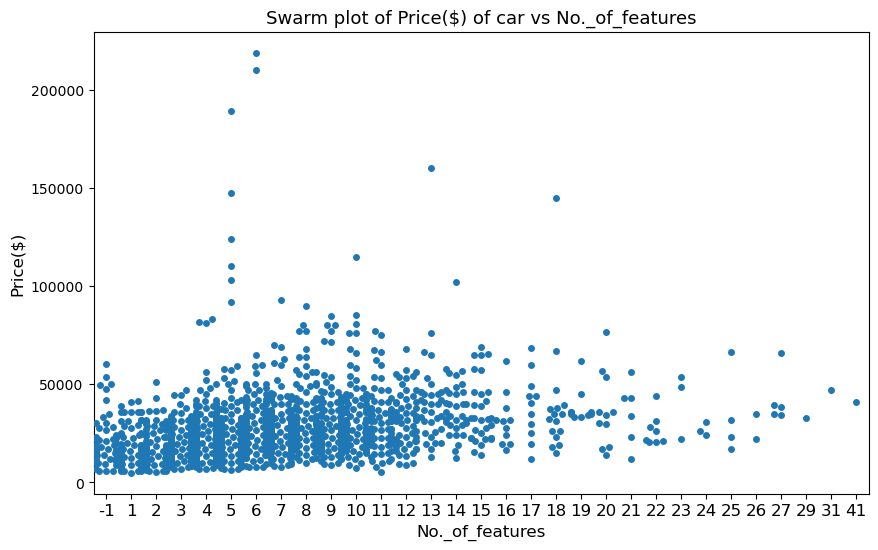

In [110]:
swarm_plot(df, 'No._of_features')

No. of features show a slightly positive dependence on the Price of the car. We can cluster the number of features if required for model optimization later.

In [111]:
df['No._of_features'].value_counts()[:15]

No._of_features
 3     172
 4     158
 5     148
 6     142
 7     134
 8     110
 9      99
 2      97
 10     91
 11     80
 1      73
 12     59
-1      52
 13     33
 14     33
Name: count, dtype: int64

-1 represents missing values. I will replace them with mode which is 3 for the number of features.

In [112]:
df['No._of_features'] = df['No._of_features'].apply(lambda x: 3 if x == -1 else x)

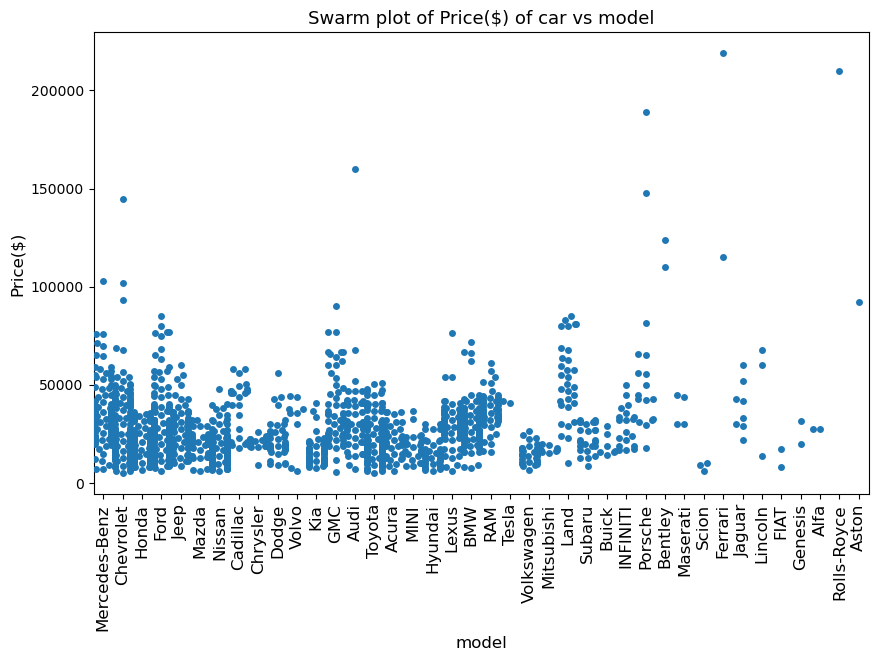

In [113]:
swarm_plot(df, 'model', 90)

Model of the car does not show any such trend with the price. However, Audi, Porsche, Ferrari and Rolls-Royce are some of the most expensive cars in the market.

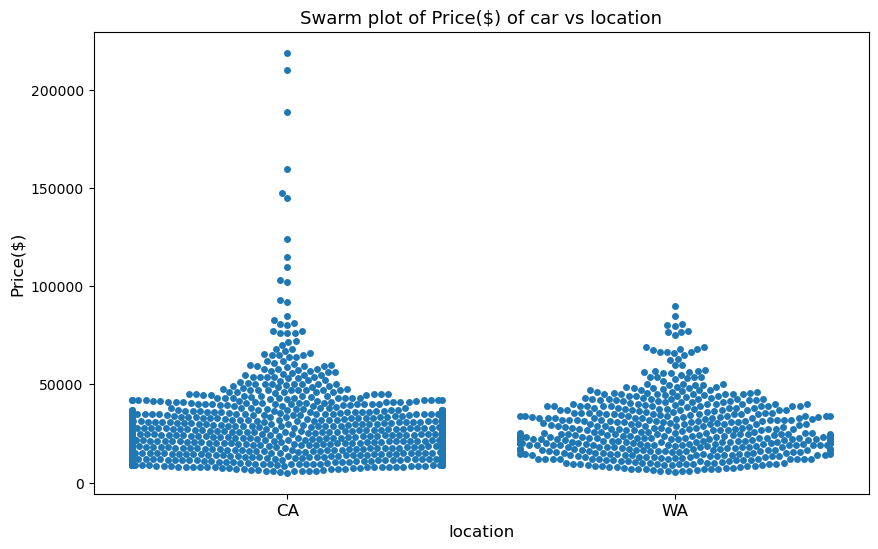

In [114]:
swarm_plot(df, 'location')

Location clearly show no dependence on the price of the car. The data only had cars from two location in United States which also removes any dependence on the price. Its possible to have a dependence given geographical location is far from each other. For **model building** I will drop this data.

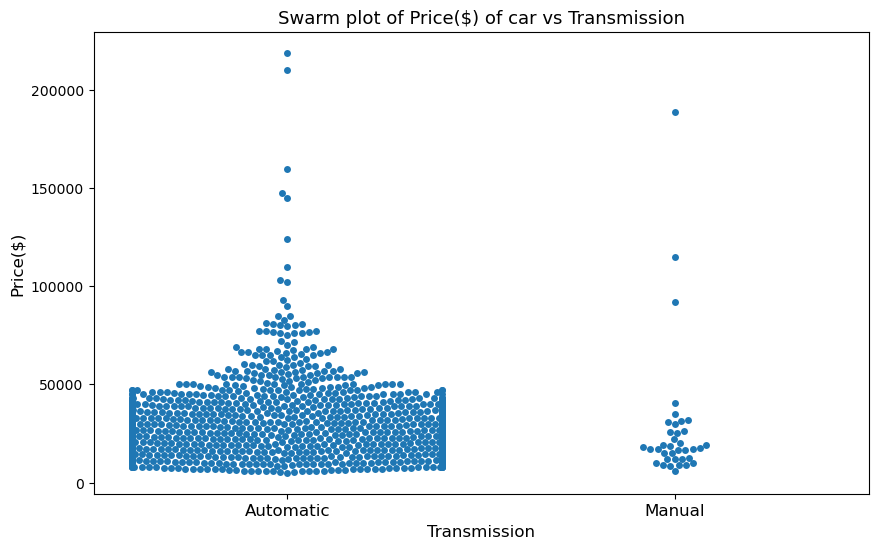

In [115]:
swarm_plot(df, 'Transmission')

The number of Automatic transmission cars out numbers the manual cars. No such dependence is observed with price of the car but it may be useful information for **model building**.

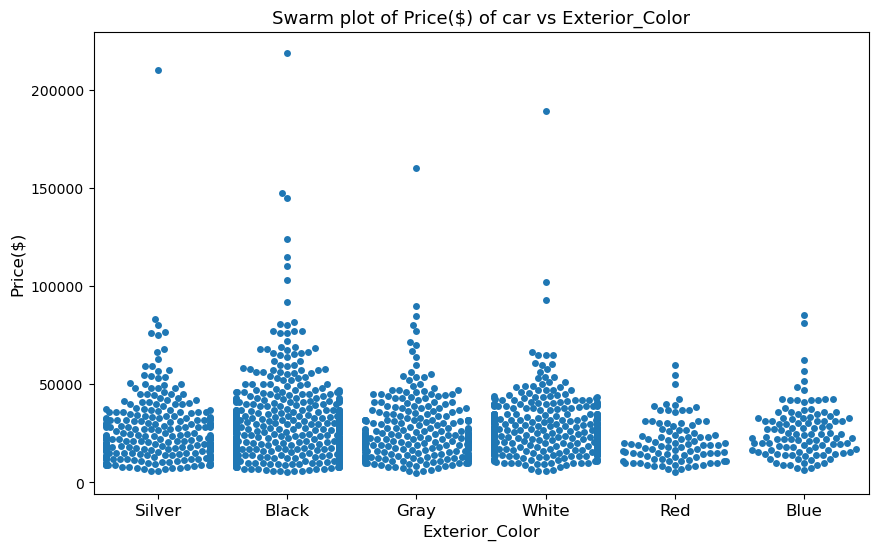

In [116]:
swarm_plot(df, 'Exterior_Color')

Exterior color of the car does not show any dependence on the price of the car but could be important in for **model building**. Therefore I will keep this data.

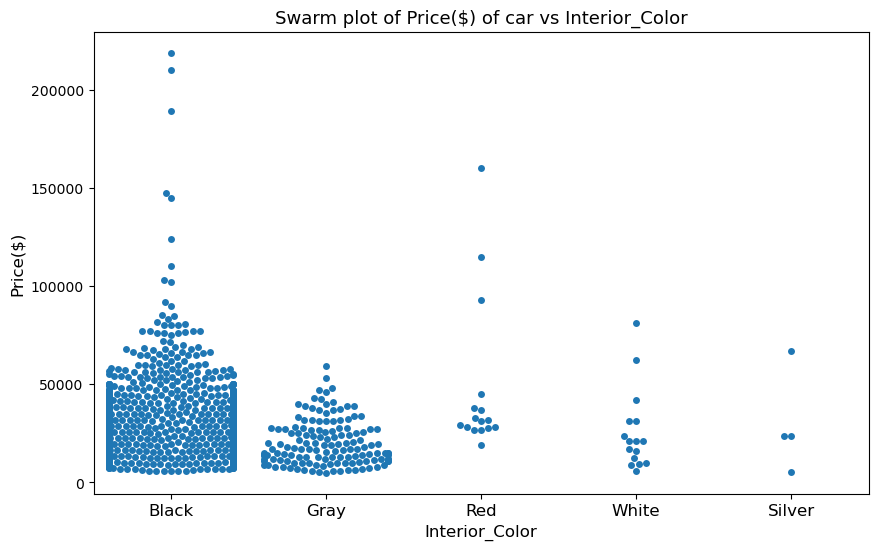

In [117]:
swarm_plot(df, 'Interior_Color')

Unlike exterior color the interior color of the car is dominated by black and gray mostly. However, I will keep this data for **model building**. If required I will impute them later.

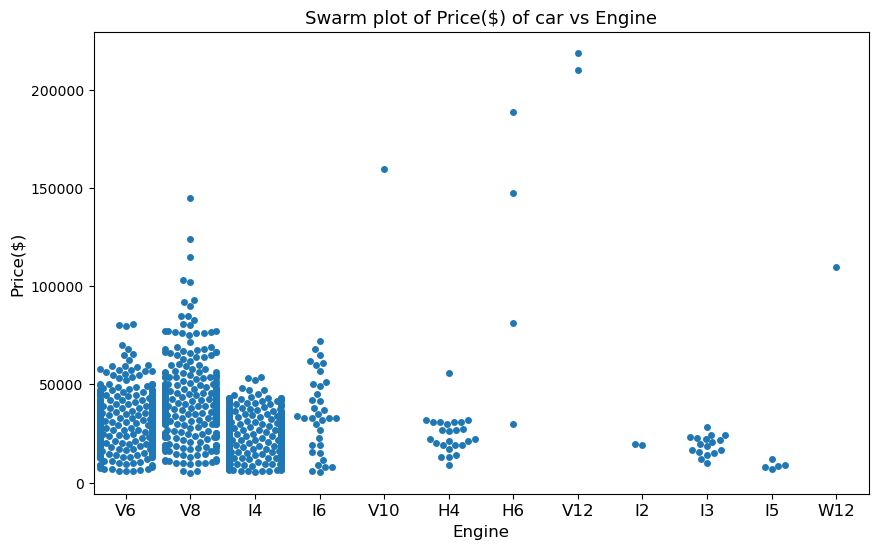

In [118]:
swarm_plot(df, 'Engine')

Strong engines(V10,V12 and W12) does show a positive dependence on the price of car. Which make sense as expensive cars tend to have powerful engines.

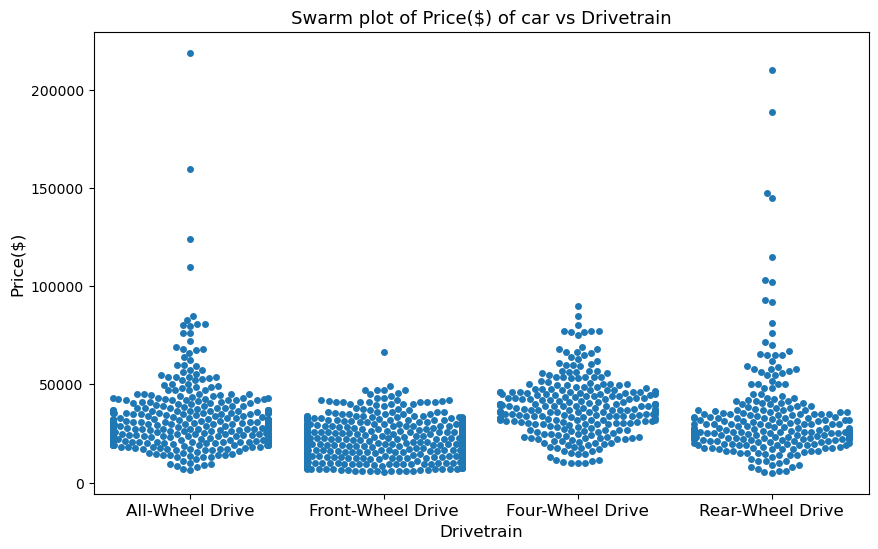

In [119]:
swarm_plot(df, 'Drivetrain')

Drivetrain does show an effect on the price of car. Four-wheel drive are slightly expensive followed by All-wheel drive, Rear-Wheel drive and Front-Wheel Drive respectively.

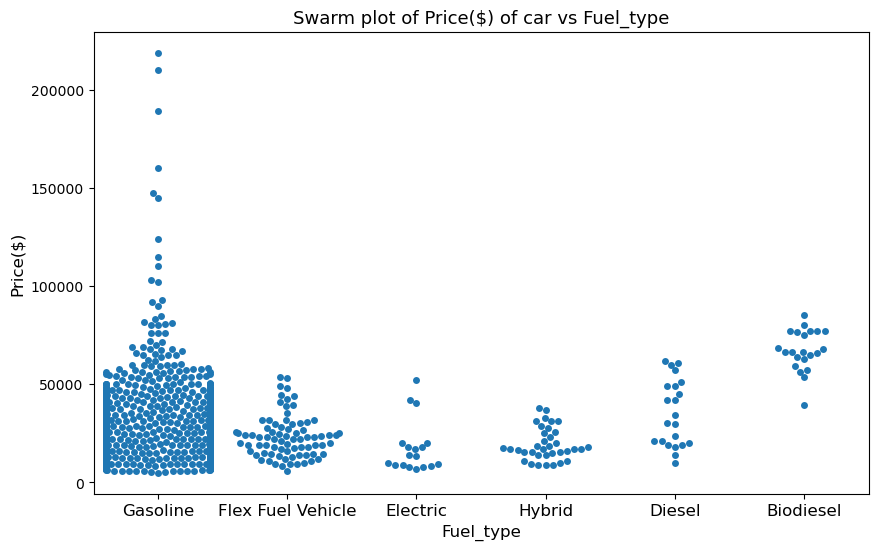

In [120]:
swarm_plot(df, 'Fuel_type')

Data shows cars which run on biodiesel are more expensive compared to others.

# Pivot tables

In [121]:
np.round(pd.pivot_table(df, values='price($)', index=['model'],
               aggfunc='mean')).sort_values('price($)', ascending=False)

,price($)
model,
Rolls-Royce,209900.0
Ferrari,166950.0
Bentley,116950.0
Aston,91998.0
Porsche,60368.0
Land,52463.0
Lincoln,47298.0
Tesla,41320.0
Cadillac,39727.0


This gives us an idea of which model of car to target during shopping according to price range.

In [122]:
np.round(pd.pivot_table(df, values='price($)', index=['model'],
               aggfunc='count')).sort_values('price($)', ascending=False)

,price($)
model,
Ford,150
Chevrolet,145
Toyota,135
Honda,122
Mercedes-Benz,102
Nissan,97
BMW,87
Lexus,76
Jeep,70


Ford, Chevrolet, Toyota, Honda and Mercedes are the most common cars available in the market.

In [123]:
np.round(pd.pivot_table(df, values='price($)', index=['Engine'],
               aggfunc='mean')).sort_values('price($)', ascending=False)

,price($)
Engine,
V12,214400.0
V10,159900.0
H6,111922.0
W12,109999.0
V8,41759.0
I6,35062.0
V6,29662.0
H4,24402.0
I4,20303.0


Cars with powerful engine are more expensive.

In [124]:
np.round(pd.pivot_table(df, values='price($)', index=['Transmission'],
               aggfunc='mean')).sort_values('price($)', ascending=False)

,price($)
Transmission,
Manual,27849.0
Automatic,27295.0


No such price difference is observed for the transmission of the car.

In [125]:
np.round(pd.pivot_table(df, values='Gas_mileage_comb(MPG)', index=['Engine'], 
               aggfunc='mean')).sort_values('Gas_mileage_comb(MPG)', ascending=False)

,Gas_mileage_comb(MPG)
Engine,
I2,109.0
I4,29.0
H4,27.0
I3,27.0
I5,26.0
I6,23.0
V6,22.0
H6,20.0
V12,20.0


As discussed before the powerful engines(V8, V10, V12, W12) does show a lower gas mileage.

In [126]:
np.round(pd.pivot_table(df, values='price($)', index=['Fuel_type', 'Drivetrain', 'Transmission'],
               aggfunc='mean'))

price($)
Fuel_type         Drivetrain        Transmission          
Biodiesel         Four-Wheel Drive  Automatic      67480.0
                  Front-Wheel Drive Automatic      66495.0
Diesel            All-Wheel Drive   Automatic      29867.0
                  Four-Wheel Drive  Automatic      47925.0
                  Front-Wheel Drive Automatic      34998.0
                  Rear-Wheel Drive  Automatic      16378.0
Electric          All-Wheel Drive   Automatic      44880.0
                  Front-Wheel Drive Automatic      12551.0
Flex Fuel Vehicle All-Wheel Drive   Automatic      18619.0
                  Four-Wheel Drive  Automatic      30201.0
                  Front-Wheel Drive Automatic      19196.0
                  Rear-Wheel Drive  Automatic      21296.0
Gasoline          All-Wheel Drive   Automatic      34156.0
                                    Manual         20234.0
                  Four-Wheel Drive  Automatic      36894.0
                                    Manual         30394.0
                  Front-Wheel Drive Automatic      19206.0
                                    Manual         13911.0
                  Rear-Wheel Drive  Automatic      33997.0
                                    Manual         45232.0
Hybrid            All-Wheel Drive   Automatic      27213.0
                  Front-Wheel Drive Automatic      15159.0

This data shows biodiesel cars are the most expensive and used electric cars are the cheapest. 

In [127]:
pd.pivot_table(df, values='price($)', index=['Fuel_type', 'Drivetrain', 'Transmission'],
               aggfunc='count')

price($)
Fuel_type         Drivetrain        Transmission          
Biodiesel         Four-Wheel Drive  Automatic           21
                  Front-Wheel Drive Automatic            1
Diesel            All-Wheel Drive   Automatic            9
                  Four-Wheel Drive  Automatic            7
                  Front-Wheel Drive Automatic            4
                  Rear-Wheel Drive  Automatic            2
Electric          All-Wheel Drive   Automatic            3
                  Front-Wheel Drive Automatic           15
Flex Fuel Vehicle All-Wheel Drive   Automatic            7
                  Four-Wheel Drive  Automatic           29
                  Front-Wheel Drive Automatic           33
                  Rear-Wheel Drive  Automatic            9
Gasoline          All-Wheel Drive   Automatic          304
                                    Manual               7
                  Four-Wheel Drive  Automatic          188
                                    Manual               2
                  Front-Wheel Drive Automatic          692
                                    Manual              14
                  Rear-Wheel Drive  Automatic          208
                                    Manual              14
Hybrid            All-Wheel Drive   Automatic           13
                  Front-Wheel Drive Automatic           23

Gasoline is the most common type of fuel in the cars. Along with the fuel type, Front wheel drive and Automatic transmission is also very common.

In [128]:
np.round(pd.pivot_table(df, values='price($)', index=['Engine', 'Drivetrain', 'Transmission'],
               aggfunc='mean'))

price($)
Engine Drivetrain        Transmission          
H4     All-Wheel Drive   Automatic      23275.0
                         Manual         21039.0
       Rear-Wheel Drive  Automatic      55995.0
                         Manual         29898.0
H6     Rear-Wheel Drive  Automatic      86267.0
                         Manual        188888.0
I2     Rear-Wheel Drive  Automatic      19188.0
I3     All-Wheel Drive   Automatic      25372.0
       Front-Wheel Drive Automatic      18250.0
I4     All-Wheel Drive   Automatic      28043.0
                         Manual         18222.0
       Four-Wheel Drive  Automatic      25564.0
       Front-Wheel Drive Automatic      16376.0
                         Manual         13911.0
       Rear-Wheel Drive  Automatic      28444.0
                         Manual         16248.0
I5     Front-Wheel Drive Automatic       8793.0
I6     All-Wheel Drive   Automatic      40863.0
       Four-Wheel Drive  Automatic      45347.0
       Front-Wheel Drive Automatic      32332.0
       Rear-Wheel Drive  Automatic      30477.0
                         Manual         18995.0
V10    All-Wheel Drive   Automatic     159900.0
V12    All-Wheel Drive   Automatic     218900.0
       Rear-Wheel Drive  Automatic     209900.0
V6     All-Wheel Drive   Automatic      35251.0
       Four-Wheel Drive  Automatic      34541.0
                         Manual         30394.0
       Front-Wheel Drive Automatic      24249.0
       Rear-Wheel Drive  Automatic      29717.0
                         Manual         13627.0
V8     All-Wheel Drive   Automatic      55023.0
       Four-Wheel Drive  Automatic      42974.0
       Front-Wheel Drive Automatic      30688.0
       Rear-Wheel Drive  Automatic      41208.0
                         Manual         53681.0
W12    All-Wheel Drive   Automatic     109999.0

Manual cars are in general cheaper except for H6 engine with Rear wheel drive where manual car seems to be very expensive. It could be a outlier or maybe depend on other factors of the car.

In [129]:
pd.pivot_table(df, values='price($)', index=['Engine', 'Drivetrain', 'Transmission'],
               aggfunc='count')

price($)
Engine Drivetrain        Transmission          
H4     All-Wheel Drive   Automatic           18
                         Manual               5
       Rear-Wheel Drive  Automatic            1
                         Manual               1
H6     Rear-Wheel Drive  Automatic            3
                         Manual               1
I2     Rear-Wheel Drive  Automatic            2
I3     All-Wheel Drive   Automatic            2
       Front-Wheel Drive Automatic           15
I4     All-Wheel Drive   Automatic          176
                         Manual               2
       Four-Wheel Drive  Automatic           20
       Front-Wheel Drive Automatic          526
                         Manual              14
       Rear-Wheel Drive  Automatic           86
                         Manual               2
I5     Front-Wheel Drive Automatic            5
I6     All-Wheel Drive   Automatic            6
       Four-Wheel Drive  Automatic            7
       Front-Wheel Drive Automatic            3
       Rear-Wheel Drive  Automatic           18
                         Manual               1
V10    All-Wheel Drive   Automatic            1
V12    All-Wheel Drive   Automatic            1
       Rear-Wheel Drive  Automatic            1
V6     All-Wheel Drive   Automatic          105
       Four-Wheel Drive  Automatic           75
                         Manual               2
       Front-Wheel Drive Automatic          168
       Rear-Wheel Drive  Automatic           62
                         Manual               3
V8     All-Wheel Drive   Automatic           26
       Four-Wheel Drive  Automatic          143
       Front-Wheel Drive Automatic           51
       Rear-Wheel Drive  Automatic           46
                         Manual               6
W12    All-Wheel Drive   Automatic            1

Combination of I4(engine), Front wheel drive and Automatic transmission is the most common in cars.

In [130]:
np.round(pd.pivot_table(df[df['Fuel_type']=='Gasoline'], values='price($)', index=['Drivetrain', 'Transmission'],
               columns ='Exterior_Color', aggfunc='mean'))

Exterior_Color                    Black     Blue     Gray      Red   Silver  \
Drivetrain        Transmission                                                
All-Wheel Drive   Automatic     36989.0  34159.0  36436.0  25258.0  31395.0   
                  Manual        26490.0  16490.0      NaN      NaN  15902.0   
Four-Wheel Drive  Automatic     36650.0  39141.0  36598.0  36177.0  36820.0   
                  Manual        30394.0      NaN      NaN      NaN      NaN   
Front-Wheel Drive Automatic     18716.0  19558.0  18781.0  16354.0  18737.0   
                  Manual        14881.0  11986.0   5899.0   9046.0  16067.0   
Rear-Wheel Drive  Automatic     38436.0  25955.0  31228.0  20392.0  38840.0   
                  Manual        60346.0  18995.0  31500.0  17900.0  21297.0   

Exterior_Color                    White  
Drivetrain        Transmission           
All-Wheel Drive   Automatic     30507.0  
                  Manual        25476.0  
Four-Wheel Drive  Automatic     37060.0  
                  Manual            NaN  
Front-Wheel Drive Automatic     21361.0  
                  Manual        21000.0  
Rear-Wheel Drive  Automatic     31413.0  
                  Manual        64893.0

Manual cars with Rear wheel drive are one of the expensive cars.

# Finalizing Dataframe for model building

In [131]:
df.head(3)

,price($),age_of_car,model,location,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_city(MPG),Gas_mileage_HW(MPG),Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len,Exterior_color_imputed
0,36999,7,Mercedes-Benz,CA,Automatic,30336,Silver,Black,17,22,19,V6,All-Wheel Drive,Gasoline,5,2551,0
1,39415,7,Chevrolet,CA,Automatic,36052,Black,Black,23,29,25,V8,Front-Wheel Drive,Flex Fuel Vehicle,15,6158,0
2,19697,4,Honda,CA,Automatic,17000,Gray,Black,30,38,33,I4,Front-Wheel Drive,Gasoline,5,2683,0


In [132]:
df.drop(columns =['location', 'Gas_mileage_city(MPG)', 'Gas_mileage_HW(MPG)'] , inplace = True)
df = df.reset_index(drop=True)

In [133]:
df.to_csv(r'C:\Users\91810\project\car_price predictor\data_modelbuild.csv')

# Next step

I will perform different machine learning algorithms to figure out best model for predicting a used car price depending on the inputs given.

# Wordcloud

NLP can be performed on Description of the car however it can be done at later stage of project if required. Below I just looked at most common word mentioned in the description.

In [134]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [135]:
# ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_eda.ipynb
def Display_WordCloud(Column):
    words = " ".join(Column)

    def punctuation_stop(text):
        """remove punctuation and stop words"""
        filtered = []
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        for w in word_tokens:
            if w not in (stop_words)  and w.isalpha() :
                filtered.append(w.lower())
        return filtered


    words_filtered = punctuation_stop(words)
    text = " ".join([ele for ele in words_filtered])
    wc= WordCloud(background_color="black", random_state=1,
                  stopwords=STOPWORDS, max_words = 2000, width =2500, height = 2500)
    wc.generate(text)

    plt.figure(figsize=[8,8])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()

In [ ]:
Display_WordCloud(df_car['Description'])

All these word does make sense for a car. Most commonly specifications of cars are mentioned such as: lock, tires, mirror, seat, brakes, steering, air bag etc.